In [1]:
#Assignment #2 VidalDosSantos, Jelic, Forte
#read in bibs for visualization
#aprox. 00:05:18
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in data edited file from Assignment#1, set edited column ID als index col --> otherwise a second id column would be generated...
accidents = pd.read_csv('data/MA1_finished.csv', index_col='ID')

In [3]:
#set the max output number for the columns to none so all columns get displayed for this call + show head
#get overview of all columns of the new file
pd.set_option('display.max_columns', None)
accidents.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
#revert function above so not all are shown...
pd.reset_option('display.max_columns')

In [5]:
#check types of attributes --> evaluate which columns are suitable for different types of diagramms !good Overview! --> we took: Severity, Start_Time, Temperature, State
accidents.dtypes

Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station   

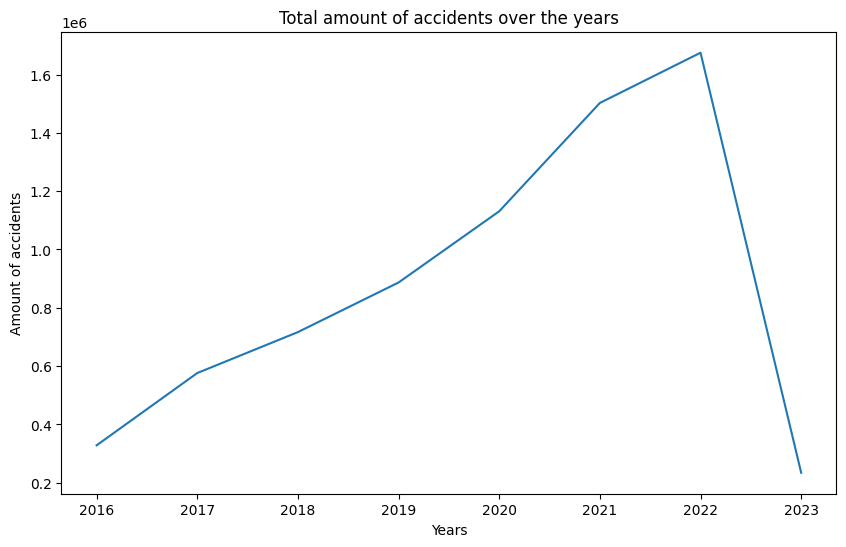

In [6]:
#For the dataexploration the following columns will be seleceted: Severity, Start_Time, Temperature(F), State
#create line-chart --> yearly (total) amount of accidents to see "trends"
#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

#title
ax.set_title("Total amount of accidents over the years")
#set naming for axes
ax.set_xlabel("Years")
ax.set_ylabel("Amount of accidents")

#insert data
#convert to String in order to execute str ops
accidents['Start_Time'] = accidents['Start_Time'].astype(str)
#clean Startdate so fractions are getting truncated (previous format: "%Y-%m-%d %H:%M:%S": ".000000 --> new format: "%Y-%m-%d %H:%M:%S"
accidents['Start_Time'] = accidents['Start_Time'].str.split('.').str[0]
#convert Start_time from object to dateTime 
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
#Extract Year from Start_Time
accidents['Year'] = accidents['Start_Time'].dt.year
#Count total amount of accidents
total_amount_of_accidents_per_year = accidents['Year'].value_counts().sort_index()
#plot the index/values
ax.plot(total_amount_of_accidents_per_year.index, total_amount_of_accidents_per_year.values)

plt.show()
#This chart shows how the the total amount of accidents changes over the year. It is clear that the amount of accidents increased during the last years. in 2023 there is a down peak... 
#Interpretation: The data for 2023 is incomplete (only jan and feb) therefore there is less data available.

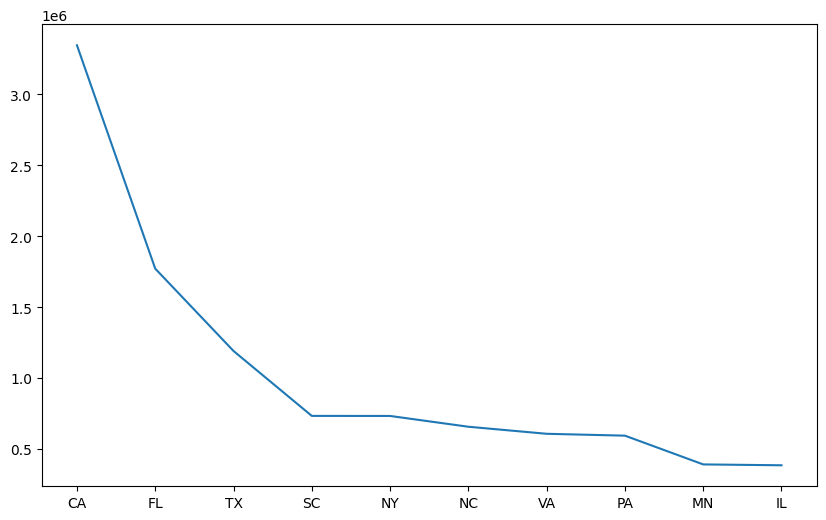

In [7]:
#Working line graph as alternative
severity_sum = accidents.groupby('State')['Severity'].sum()
top10states = severity_sum.nlargest(10)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel("")
ax.set_ylabel("")

ax.plot(top10states.index, top10states.values)
plt.show()
#Top10 states with most accidents

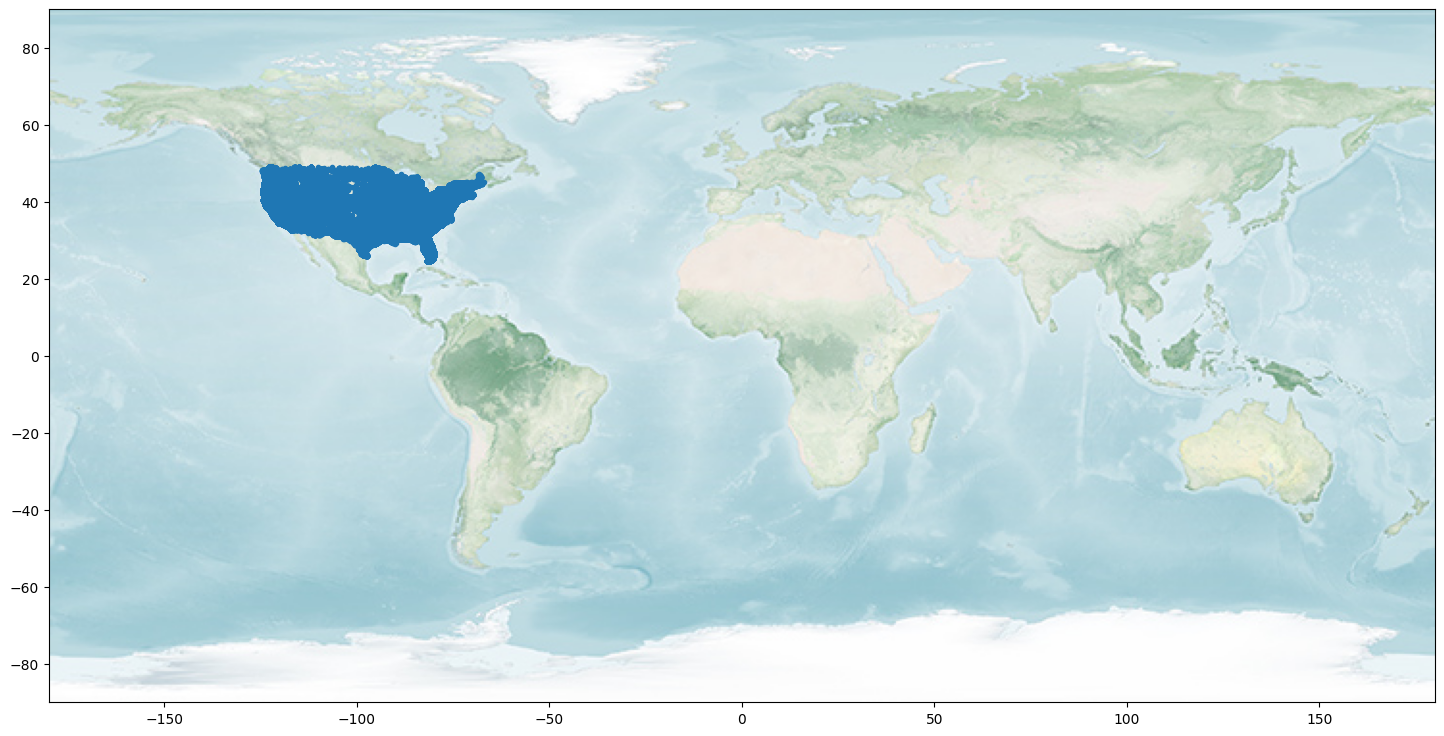

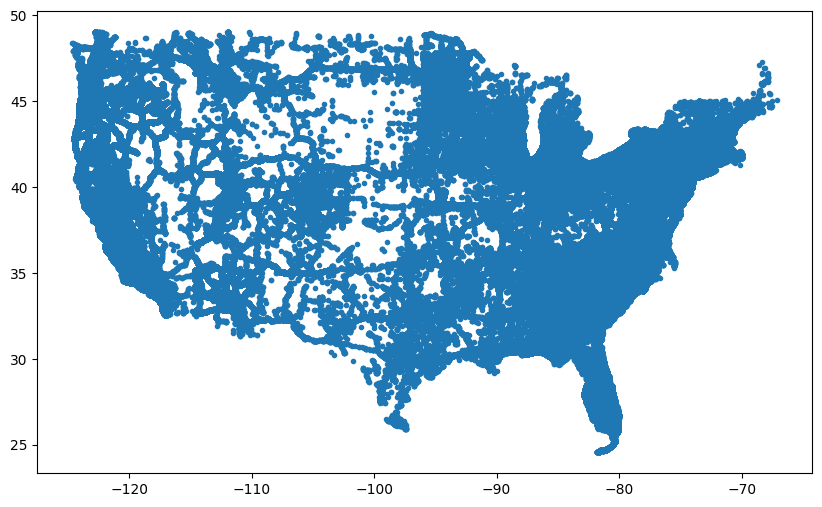

In [8]:
#creation of scatter-plot
# Create a plot with a given size
worldmap = plt.imread('img/eo_base_2020_clean_720x360.jpg')
# Seitenverhältnis des Bilds berechnen: Breite des Bilds / Höhe des Bilds
# aspect_ratio = worldmap.shape[1] / worldmap.shape[0]
# Das Bild ist eine "platte" Projektion der Erde, so das wir Geographische
# Koordinaten direkt als x,y Position auf dem Bild verwenden können
# Bounding Box: links, rechts, unten, oben
# Das Bild geht von -180 bis +180 Längengrad und von -90 bis +90 Breitengrad
bbox = (-180, 180, -90, 90)
us_bbox = (-125, -66, 24, 50)

# Erstellen eines Plots mit gegebener Größe
fig, ax = plt.subplots(figsize=(18, 9))

# Koordinatensystem über Bild legen
ax.set_xlim(bbox[0], bbox[1])
ax.set_ylim(bbox[2], bbox[3])

# Anzeigen des Bilds
ax.imshow( worldmap, zorder=0, extent=bbox)

# Scatter plot of accidents
ax.scatter(x=accidents['Start_Lng'], y=accidents['Start_Lat'], marker='.')
plt.show()
plt.show()

#zoom in for NA only --> good for analysis of locations --> analysis: most of the accidents are on west/east coast. it gets less on middle part of US 
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=accidents['Start_Lng'], y=accidents['Start_Lat'],marker='.')
plt.show()

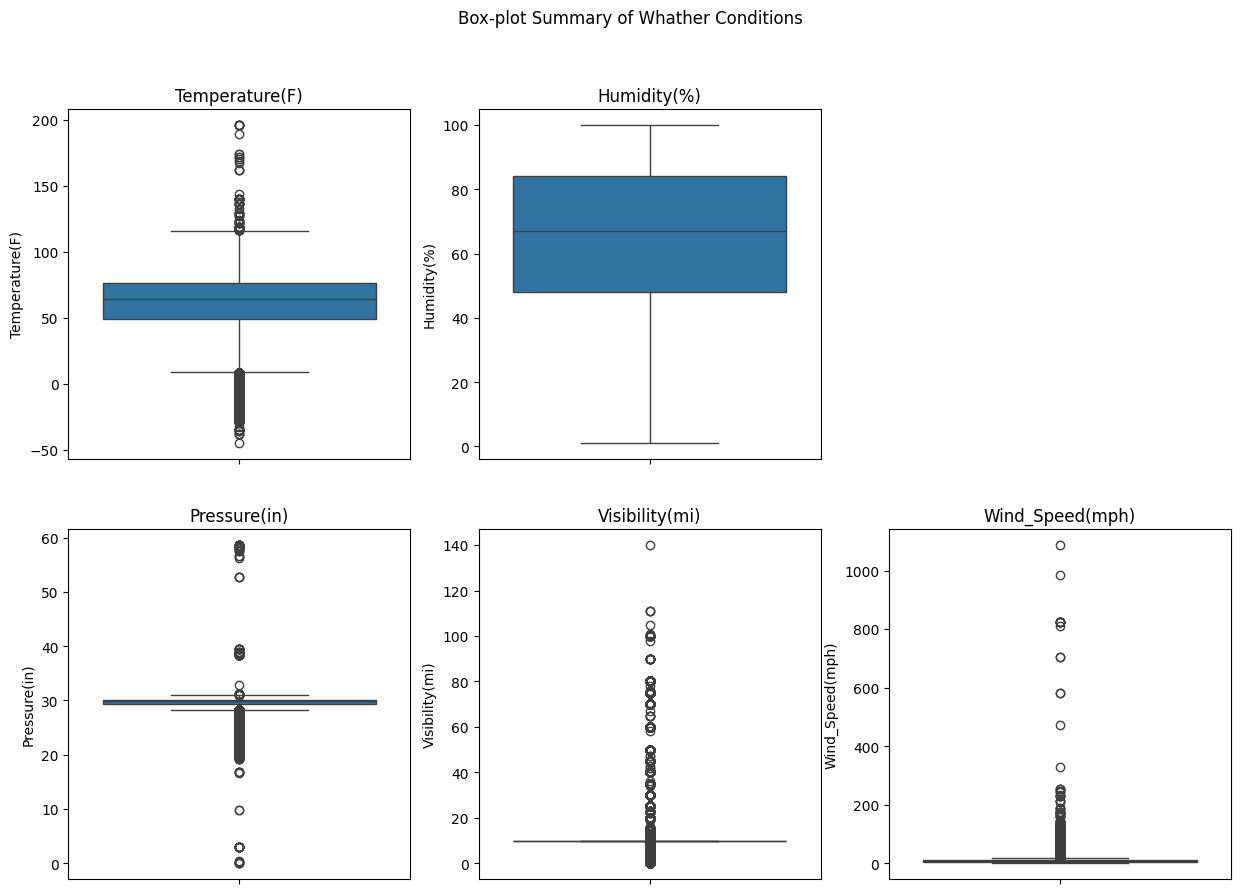

In [9]:
#Boxplots for most weather conditons (Temperature, Humidity, Windchill, Pressure, Visability, Wind_Speed) 
#--> ax.boxplot scales the y-axis wrong --> use seaborn for creation of boxplot

#fig, ax = plt.subplots()
#ax.boxplot(accidents['Temperature(F)'], labels=['Temperature(F)'])

#creating sub-plot for better overview
plt.figure(figsize=(15,10))
plt.suptitle('Box-plot Summary of Whather Conditions')

#creation of the boxplots
plt.subplot(2,3,1)
sns.boxplot(y=accidents['Temperature(F)'])
plt.title('Temperature(F)')

plt.subplot(2,3,2)
sns.boxplot(y=accidents['Humidity(%)'])
plt.title('Humidity(%)')

#Windchill got removed in cleaning process
#plt.subplot(2,3,3)
#sns.boxplot(y=accidents['Wind_Chill(F)'])
#plt.title('Wind_Chill(F)')

plt.subplot(2,3,4)
sns.boxplot(y=accidents['Pressure(in)'])
plt.title('Pressure(in)')

plt.subplot(2,3,5)
sns.boxplot(y=accidents['Visibility(mi)'])
plt.title('Visibility(mi)')

plt.subplot(2,3,6)
sns.boxplot(y=accidents['Wind_Speed(mph)'])
plt.title('Wind_Speed(mph)')

plt.show()

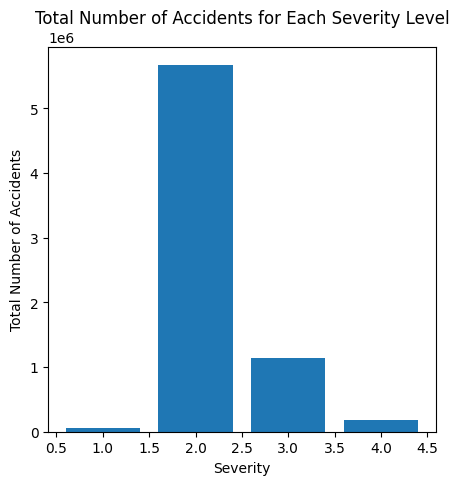

In [10]:
#barchart total amount of accidents for each severity level
total_accidents_per_severity = accidents['Severity'].value_counts()

plt.figure(figsize=(5,5))
plt.bar(total_accidents_per_severity.index, total_accidents_per_severity.values)
plt.xlabel('Severity')
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents for Each Severity Level')
plt.show()

In [11]:
#statistics for column Start_Time
#total amount of accidents
print(f'total amount of accidents: {accidents["Start_Time"].count()}')
#calculate amount of accidents per year (formatting already done)

#create new column year --> count for each year
accidents['Year'] = accidents['Start_Time'].dt.year
print(f'total amount of accidents per year: {accidents['Year'].value_counts().sort_index().to_string()}')

#create new column month --> count for each month
accidents['Month'] = accidents['Start_Time'].dt.month
print(f'total amount of accidents per month: {accidents['Month'].value_counts().sort_index().to_string()}')

#create new column day --> count for each day
accidents['Day'] = accidents['Start_Time'].dt.dayofweek
print(f'total amount of accidents per day: {accidents['Day'].value_counts().sort_index().to_string()}')

#create new column hour --> count for each hour 
accidents['Hour'] = accidents['Start_Time'].dt.hour
print(f'total amount of accidents per month: {accidents['Hour'].value_counts().sort_index().to_string()}')

#alternative print out peak year/month/day/hour of accidents
print(f'peak_year for accidents: {accidents['Start_Time'].dt.year.mode().to_string()}')
print(f'peak_month for accidents: {accidents['Start_Time'].dt.month.mode().to_string()}')
print(f'peak_day for accidents: {accidents['Start_Time'].dt.day.mode().to_string()}')
print(f'peak_hour for accidents: {accidents['Start_Time'].dt.hour.mode().to_string()}')

#Alternative: calculate avg duration of a accident
#calculate start and end_date for each 
#Start_Time already converted to DT... convert End_Time into DT !Take care of format for End_Time from!
#convert to String in order to execute str ops
accidents['End_Time'] = accidents['End_Time'].astype(str)
#clean End_Time so fractions are getting truncated (previous format: "%Y-%m-%d %H:%M:%S": ".000000 --> new format: "%Y-%m-%d %H:%M:%S")
accidents['End_Time'] = accidents['End_Time'].str.split('.').str[0]
#convert End_Time from object to dateTime
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])
#caculate avg duration
accidents['Duration'] = (accidents['End_Time'] - accidents['Start_Time'])
accidents['Duration'] = (accidents['Duration']).dt.total_seconds()
print(f'the avereage duration of a accidents (time till traffic flow normalizes) is {accidents['Duration'].mean()/1} minutes')
#-> some values are outlines that cannot be fixed! -> we need to document

total amount of accidents: 7051556
total amount of accidents per year: Year
2016     328560
2017     576416
2018     716816
2019     886867
2020    1131090
2021    1502521
2022    1674707
2023     234579
total amount of accidents per month: Month
1     684035
2     603576
3     507061
4     550278
5     520783
6     526313
7     463899
8     539727
9     586708
10    610604
11    683799
12    774773
total amount of accidents per day: Day
0    1100102
1    1173196
2    1196128
3    1202498
4    1249881
5     617604
6     512147
total amount of accidents per month: Hour
0     101044
1      87333
2      83392
3      74789
4     140881
5     199098
6     353429
7     512980
8     510654
9     324878
10    311908
11    327391
12    329561
13    370564
14    421991
15    496692
16    549848
17    541031
18    401492
19    269843
20    203356
21    173480
22    151175
23    114746
peak_year for accidents: 0    2022
peak_month for accidents: 0    12
peak_day for accidents: 0    23
peak_hour fo

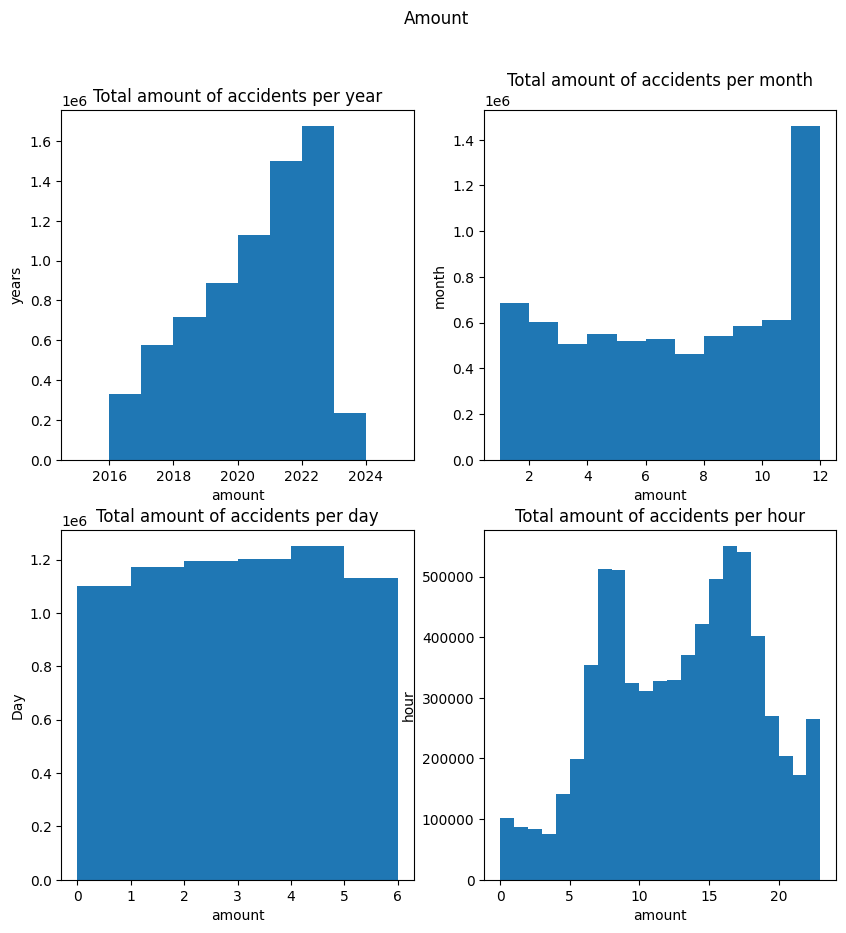

In [12]:
#create visualization of calculation above via histograms
#Histograms for Year, Month, Day, Hour, Weak

#create subplot
plt.figure(figsize=(10,10))
plt.suptitle('Amount')

ax = plt.subplot(2,2,1)
ax.set_title("Total amount of accidents per year")
ax.set_xlabel('amount')
ax.set_ylabel('years')
ax.hist(accidents['Year'], bins=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025])

ax = plt.subplot(2,2,2)
ax.set_title("Total amount of accidents per month")
ax.set_xlabel('amount')
ax.set_ylabel('month')
ax.hist(accidents['Month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12])

ax = plt.subplot(2,2,3)
ax.set_title("Total amount of accidents per day")
ax.set_xlabel('amount')
ax.set_ylabel('Day')
ax.hist(accidents['Day'], bins=[0,1,2,3,4,5,6])

ax = plt.subplot(2,2,4)
ax.set_title("Total amount of accidents per hour")
ax.set_xlabel('amount')
ax.set_ylabel('hour')
ax.hist(accidents['Hour'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.show()
#furthermore we could analyse hours on weekdays/weekend or for single years 

In [13]:
#stataische zusammenfassung der Wetter Konditionen
accidents[['Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].describe().map("{:.2f}".format)

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7051556.00,7051556.00,7051556.00,7051556.00,7051556.00
mean,61.87,64.42,29.51,9.11,7.69
std,19.04,22.76,1.01,2.64,5.41
min,-45.00,1.00,0.00,0.00,0.00
25%,49.00,48.00,29.34,10.00,4.60
50%,64.00,67.00,29.84,10.00,7.00
75%,76.00,84.00,30.02,10.00,10.40
max,196.00,100.00,58.63,140.00,1087.00


In [14]:
#grouping by county and weather conditions.
#the column source gives the amount of accidents per state.
# --> it is possible to make statement about the cause of the accident. 
accidents.groupby('State').agg({'Severity': 'mean', 'Temperature(F)':'mean', 'Humidity(%)': 'mean', 'Pressure(in)': 'mean', 'Visibility(mi)': 'mean', 'Wind_Speed(mph)': 'mean'})

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
State,,,,,,
AL,2.236041,66.717437,68.626918,29.689845,9.113270,6.401098
AR,2.258382,59.902130,70.969768,29.627438,8.848143,7.106137
AZ,2.105020,72.853534,32.008570,28.329711,10.144705,7.123635
CA,2.147954,64.113925,58.180627,29.610879,9.111675,6.551532
CO,2.434757,47.965074,51.788007,25.581524,11.034099,8.470613
CT,2.336371,54.850274,65.860998,29.871405,8.947024,7.882013
DC,2.132308,59.541776,62.754659,29.977301,9.481137,8.193974
DE,2.250037,59.074120,66.961272,29.981912,9.173195,8.922294
FL,2.134811,75.516617,71.030200,30.014339,9.533047,8.509313


In [15]:
#sort the data for the highest and lowest temperature
#could be useful to lookup possible causes of accidents
accidents.sort_values('Temperature(F)',ascending=False).head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration
ID,,,,,,,,,,,,,,,,,,,,,
5892168,2,2021-08-12 13:03:26,2021-08-12 13:57:48,33.167696,-87.528356,0.214,Stationary traffic on US-11 N - US-82 W - AL-6...,Skyland Blvd E,Tuscaloosa,Tuscaloosa,...,False,Day,Day,Day,Day,2021,8,3,13,3262.0
6056189,2,2021-08-12 13:03:26,2021-08-12 14:01:42,33.167468,-87.531087,0.324,Stationary traffic on US-11 N - AL-7 from AL-2...,Skyland Blvd E,Tuscaloosa,Tuscaloosa,...,False,Day,Day,Day,Day,2021,8,3,13,3496.0
938722,2,2021-08-12 13:05:36,2021-08-12 14:05:16,33.167976,-87.525398,0.000,Left lane blocked due to accident on US-82 Mcf...,Skyland Blvd E,Tuscaloosa,Tuscaloosa,...,False,Day,Day,Day,Day,2021,8,3,13,3580.0
5642539,2,2021-08-12 13:03:26,2021-08-12 13:59:22,33.167468,-87.531087,0.412,Stationary traffic on US-11 N - AL-7 from AL-2...,Skyland Blvd E,Tuscaloosa,Tuscaloosa,...,False,Day,Day,Day,Day,2021,8,3,13,3356.0
938653,2,2021-08-12 14:11:52,2021-08-12 14:56:22,33.165043,-87.549957,0.000,Two lanes blocked due to accident on AL-69 Nor...,Skyland Blvd,Tuscaloosa,Tuscaloosa,...,False,Day,Day,Day,Day,2021,8,3,14,2670.0


In [16]:
accidents.sort_values('Temperature(F)',ascending=True).head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration
ID,,,,,,,,,,,,,,,,,,,,,
4508387,2,2022-12-22 08:55:00,2022-12-22 09:46:00,45.840816,-111.304297,5.269,Slow traffic on I-90 E from CR-346/CR-288/Exit...,I-90 E,Manhattan,Gallatin,...,False,Day,Day,Day,Day,2022,12,3,8,3060.0
3942260,2,2022-12-22 08:59:06,2022-12-22 10:18:37,45.815892,-111.257063,2.417,Incident on I-90 EB near MM 291 Expect delays.,I-90 E,Belgrade,Gallatin,...,False,Day,Day,Day,Day,2022,12,3,8,4771.0
4946663,2,2022-12-22 08:59:06,2022-12-22 10:42:37,45.813389,-111.252163,2.124,Incident on I-90 EB near MM 291 Expect delays.,I-90 E,Belgrade,Gallatin,...,False,Day,Day,Day,Day,2022,12,3,8,6211.0
4915641,2,2022-12-22 07:53:22,2022-12-22 09:09:37,45.778146,-111.205827,0.036,Incident on GREEN TREE DR near THORPE RD Expec...,Green Tree Dr,Belgrade,Gallatin,...,False,Night,Day,Day,Day,2022,12,3,7,4575.0
1152431,2,2021-02-15 08:18:57,2021-02-15 09:11:30,47.892132,-92.775208,0.000,Accident on US-53 at Olson Rd.,Highway 53,Cook,St. Louis,...,False,Day,Day,Day,Day,2021,2,0,8,3153.0


In [17]:
accidents.to_csv('data/MA2_finished.csv')